In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import load_iris

data = load_iris()
df = pd.DataFrame(data=data.data, columns=data.feature_names)

In [3]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


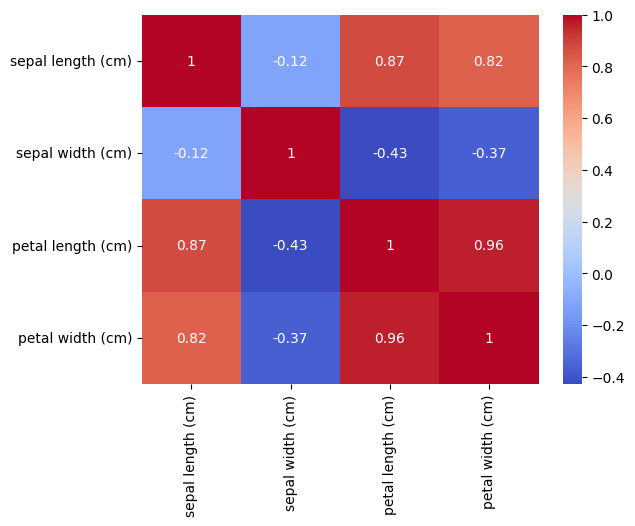

In [4]:
sns.heatmap(data=df.corr(), annot=True, cmap='coolwarm')
plt.show()

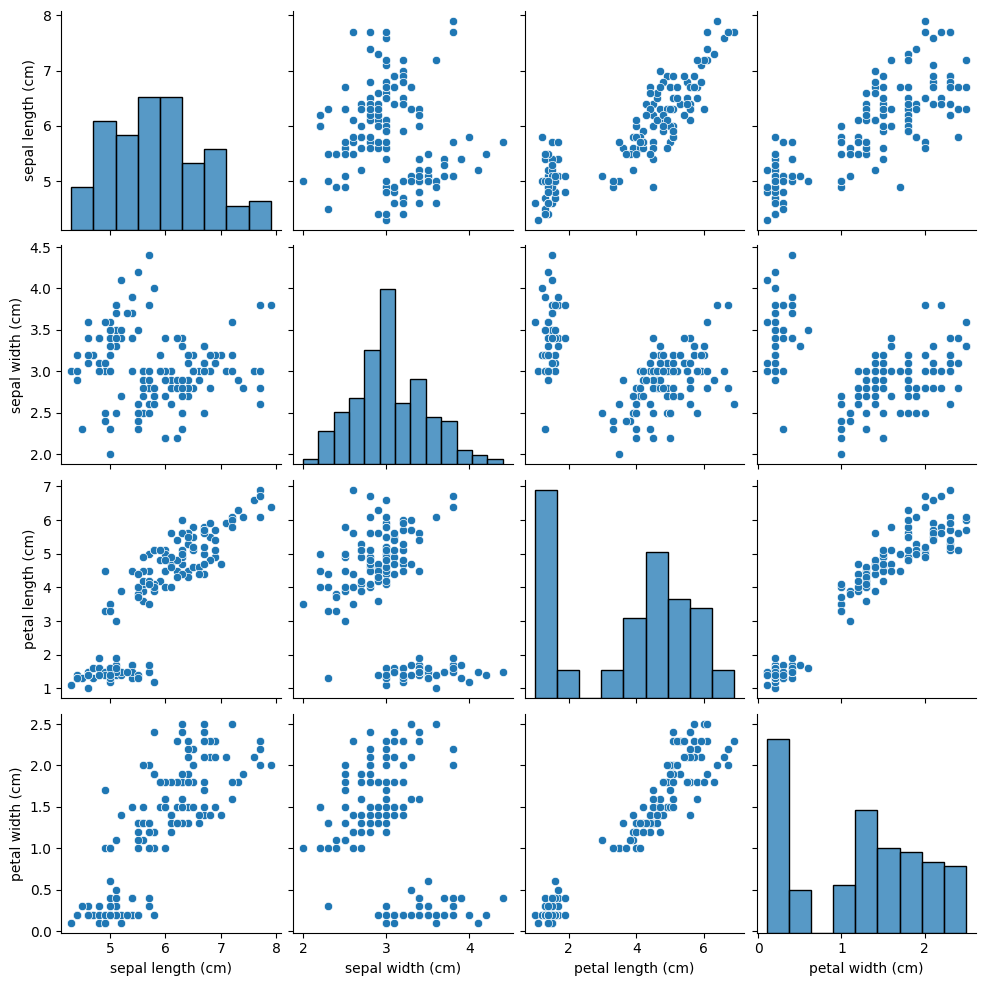

In [5]:
sns.pairplot(data=df)
plt.show()

# kmeans clustering

In [6]:
from sklearn.cluster import KMeans

wscc = []
for i in range(2,20) :
    km = KMeans(n_clusters=i)
    km.fit(df)
    wscc.append(km.inertia_)

  File "C:\Program Files\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Program Files\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\subprocess.py", line 1036, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Program Files\Python313\Lib\sub

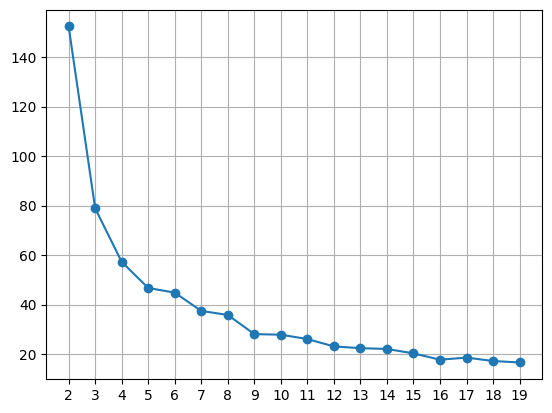

In [7]:
# Elbow graph

plt.plot([i for i in range(2,20)], wscc, marker='o')
plt.xticks([i for i in range(2,20)])
plt.grid(visible=True)
plt.show()

In [8]:
kmn = KMeans(n_clusters=3)
df['target'] = kmn.fit_predict(df)

In [9]:
print(kmn.inertia_)
df.head(2)

78.8556658259773


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1


# Hierarchical Clustering

In [10]:
df2 = df.drop(columns='target')

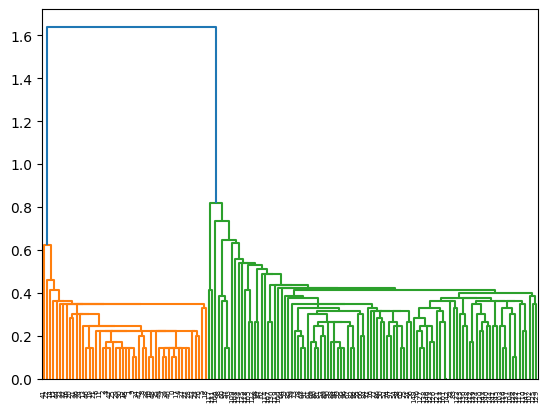

In [11]:
import scipy.cluster.hierarchy as sc

sc.dendrogram(sc.linkage(df2, method='single'))
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=3, linkage='single')
df['target_hc'] = ag.fit_predict(df)

In [13]:
df.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_hc
0,5.1,3.5,1.4,0.2,1,2
1,4.9,3.0,1.4,0.2,1,2


In [14]:
print(df['target_hc'].unique())
print(df['target'].unique())

[2 0 1]
[1 0 2]


# DBSCAN Clustering

In [15]:
df2 = df.drop(columns=['target', 'target_hc'])

In [16]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=6)
df['target_db'] = db.fit_predict(df)

In [17]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_hc,target_db
0,5.1,3.5,1.4,0.2,1,2,0
1,4.9,3.0,1.4,0.2,1,2,0
2,4.7,3.2,1.3,0.2,1,2,0


In [18]:
print(df['target_hc'].unique())
print(df['target'].unique())
print(df['target_db'].unique())

[2 0 1]
[1 0 2]
[ 0 -1  1  2]
